<a href="https://colab.research.google.com/github/kavikushi0228/FYP-ML-model-trainings/blob/main/kavinii_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install tensor flow

In [ ]:
pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Import keras

In [ ]:
import keras

#Importing dataset, model, layers

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# Load the MNIST dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the data

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


# One-hot encode the labels

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Create the model

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model

In [ ]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 154s 328ms/step - loss: 0.0221 - accuracy: 0.9927 - val_loss: 0.0302 - val_accuracy: 0.9910
Epoch 2/12
469/469 [==============================] - 146s 312ms/step - loss: 0.0208 - accuracy: 0.9931 - val_loss: 0.0319 - val_accuracy: 0.9914
Epoch 3/12
469/469 [==============================] - 146s 311ms/step - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.0316 - val_accuracy: 0.9923
Epoch 4/12
469/469 [==============================] - 146s 310ms/step - loss: 0.0179 - accuracy: 0.9942 - val_loss: 0.0335 - val_accuracy: 0.9905
Epoch 5/12
469/469 [==============================] - 146s 311ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0328 - val_accuracy: 0.9917
Epoch 6/12
469/469 [==============================] - 146s 312ms/step - loss: 0.0153 - accuracy: 0.9948 - val_loss: 0.0361 - val_accuracy: 0.9914
Epoch 7/12
469/469 [==============================] - 147s 313ms/step - loss: 0.0135 - accuracy: 0.9954 - val_loss: 0.0308 -

# Evaluate the model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.03564201667904854
Test accuracy: 0.9915000200271606


# Generate predictions for the test data

In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 7s 21ms/step


# Evaluate the model's performance

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 0.0019573425
Mean Squared Error: 0.0013852553
R2 Score: 0.9844551069950729


# Comparing test values and predicted values

313/313 [==============================] - 10s 33ms/step


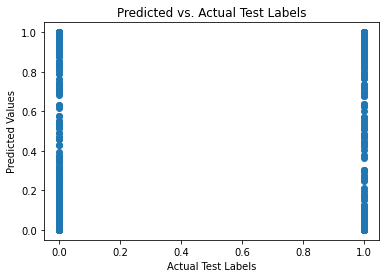

In [ ]:
import matplotlib.pyplot as plt

# Generate predictions for the test data
y_pred = model.predict(x_test)

# Plot the predicted values against the actual test labels
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Test Labels')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Test Labels')
plt.show()


# Cross validation

TypeError: ignored